In [4]:
## Import all needed modules

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy.stats import entropy

In [5]:
#### Place all data files in same directory and run
qrng=[]
prng=[]
for i in [0,1,2,3]:
  set_no=i
  for j in ['Q','P']:
    for chunk in pd.read_csv('Amp_Data_'+j+'RNG'+str(set_no)+'.bin', chunksize=10**7):
      input_=chunk.iloc[:,0]
     
      tt=sm.tsa.acf(input_,fft=True)
     
      smol1=min(np.log10(abs(tt)))
     
      mean1=np.mean(input_)
     
      ent1=entropy(input_)
  
    input_=pd.read_csv('RAW_Data_'+j+'RNG'+str(set_no)+'.bin', index_col=False)
    tt2=sm.tsa.acf(input_,fft=True)   
    
    smol2=min(np.log10(abs(tt2)))

    mean2=np.mean(input_)[0]
    
    ent2=entropy(input_)[0]
    
    #print("Diff in correl",abs(smol2-smol1))
    print("Ratio of correlation before and after",(10**smol1)/(10**smol2))
    print("Ratio of entropy before and after",abs(ent1/ent2))
    print("Ratio of mean before and after", abs(mean1/mean2))
    print('************************')
    if j=='Q':
      qrng.append((10**smol1)/(10**smol2))
    elif j=='P':
      prng.append((10**smol1)/(10**smol2))
  print("########################################################################################")

Ratio of correlation before and after 1.4429125065983575
Ratio of entropy before and after 0.7887519255942073
Ratio of mean before and after 1.000932677156954
************************
Ratio of correlation before and after 12.888119449036083
Ratio of entropy before and after 0.7880818677892517
Ratio of mean before and after 0.9917213359272862
************************
########################################################################################
Ratio of correlation before and after 0.43822130066200915
Ratio of entropy before and after 0.7884993878673411
Ratio of mean before and after 0.9971382477271692
************************
Ratio of correlation before and after 3.6663769200223424
Ratio of entropy before and after 0.7884702714916187
Ratio of mean before and after 0.99692980086171
************************
########################################################################################
Ratio of correlation before and after 9.950455312104665
Ratio of entropy before and 

In [4]:
pip install matplotlib==3.5.2

#After this, please restart the runtime.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.2 MB/s 
     |████████████████████████████████| 944 kB 61.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


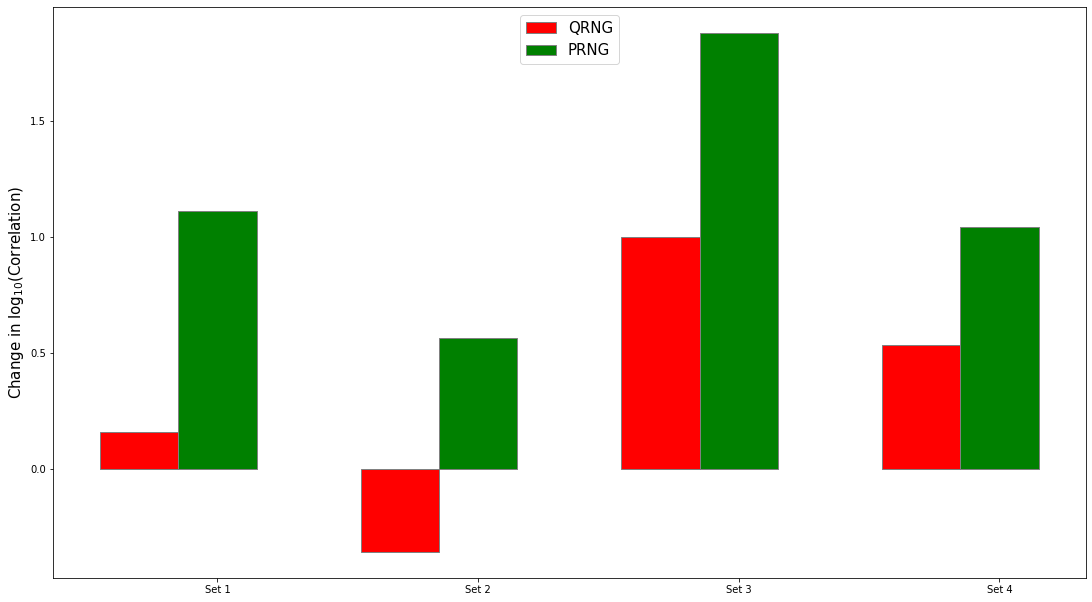

In [6]:
############################
qrng=[(np.log10(i)) for i in qrng]
prng=[np.log10(i) for i in prng]

barWidth=0.3

# Change in correlation
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
# Set position of bar on X axis
br1 = np.arange(len(qrng))
br2 = [x + barWidth for x in br1]


ax.bar(br1, qrng, color ='r', width = barWidth,
        edgecolor ='grey', label ='QRNG')
ax.bar(br2, prng, color ='g', width = barWidth,
        edgecolor ='grey', label ='PRNG')

# Adding Xticks

ax.set_ylabel('Change in log$_{10}$(Correlation)',  fontsize = 15)
ax.set_xticks([r + barWidth for r in range(len(qrng))],
        ['Set 1', 'Set 2', 'Set 3','Set 4'])
 
plt.legend(loc='upper center',prop={'size': 15})
plt.show()

fig.savefig('test2png.png', dpi=100)